In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


In [2]:
df = pd.read_excel("/content/Telecom Churn Rate Dataset.xlsx")
df

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
0,Male,Yes,No,No,1,No,No phone service,DSL,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,396.5,4758,0,0,Yes
1,Female,Yes,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,Two year,Yes,Credit card (automatic),963.5,11562,0,0,No
2,Male,Yes,Yes,No,2,Yes,No,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),955.0,11460,0,0,No
3,Male,Yes,No,No,1,Yes,No,DSL,No,No,...,No,No,Month-to-month,No,Bank transfer (automatic),452.5,5430,0,0,No
4,Female,Yes,No,No,43,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Electronic check,902.5,10830,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,Female,Yes,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,1035.0,12420,0,0,No
1138,Female,Yes,No,No,6,No,No phone service,DSL,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,444.0,5328,0,0,No
1139,Male,Yes,Yes,No,55,Yes,Yes,DSL,Yes,Yes,...,No,No,One year,No,Credit card (automatic),600.0,7200,0,0,No
1140,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,757.5,9090,0,0,Yes


In [3]:
df['Churn'].value_counts()

No     666
Yes    476
Name: Churn, dtype: int64

In [4]:
df.describe()

,Tenure,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,33.295972,798.203590,9578.443082,0.513135,0.684764
std,24.188530,237.640267,2851.683204,1.296967,1.550357
min,1.000000,189.500000,2274.000000,0.000000,0.000000
25%,10.000000,701.500000,8418.000000,0.000000,0.000000
50%,31.000000,848.500000,10182.000000,0.000000,0.000000
75%,56.000000,980.750000,11769.000000,0.000000,0.000000
max,72.000000,1174.500000,14094.000000,5.000000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1142 non-null   object 
 1   Senior_Citizen      1142 non-null   object 
 2   Partner             1142 non-null   object 
 3   Dependents          1142 non-null   object 
 4   Tenure              1142 non-null   int64  
 5   Phone_Service       1142 non-null   object 
 6   Multiple_Lines      1142 non-null   object 
 7   Internet_Service    1142 non-null   object 
 8   Online_Security     1142 non-null   object 
 9   Online_Backup       1142 non-null   object 
 10  Device_Protection   1142 non-null   object 
 11  Tech_Support        1142 non-null   object 
 12  Streaming_TV        1142 non-null   object 
 13  Streaming_Movies    1142 non-null   object 
 14  Contract            1142 non-null   object 
 15  Paper_less_Billing  1142 non-null   object 
 16  Paymen

In [6]:
df.isnull().any()

Gender                False
Senior_Citizen        False
Partner               False
Dependents            False
Tenure                False
Phone_Service         False
Multiple_Lines        False
Internet_Service      False
Online_Security       False
Online_Backup         False
Device_Protection     False
Tech_Support          False
Streaming_TV          False
Streaming_Movies      False
Contract              False
Paper_less_Billing    False
Payment_Method        False
Monthly_Charges       False
Yearly_Charge         False
Admin_Tickets         False
Tech_Tickets          False
Churn                 False
dtype: bool

In [7]:
df.isnull().sum()

Gender                0
Senior_Citizen        0
Partner               0
Dependents            0
Tenure                0
Phone_Service         0
Multiple_Lines        0
Internet_Service      0
Online_Security       0
Online_Backup         0
Device_Protection     0
Tech_Support          0
Streaming_TV          0
Streaming_Movies      0
Contract              0
Paper_less_Billing    0
Payment_Method        0
Monthly_Charges       0
Yearly_Charge         0
Admin_Tickets         0
Tech_Tickets          0
Churn                 0
dtype: int64

In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Tenure,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets
Tenure,1.000000,0.267175,0.267175,0.026220,0.254684
Monthly_Charges,0.267175,1.000000,1.000000,0.012450,0.257708
Yearly_Charge,0.267175,1.000000,1.000000,0.012450,0.257708
Admin_Tickets,0.026220,0.012450,0.012450,1.000000,-0.028886
Tech_Tickets,0.254684,0.257708,0.257708,-0.028886,1.000000


<ipython-input-9-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

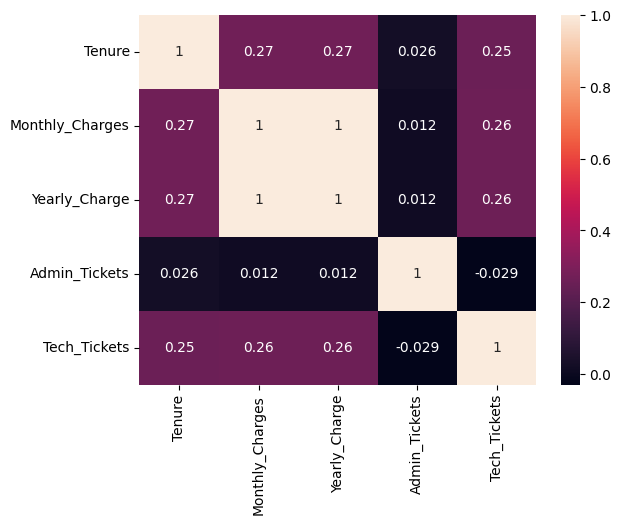

In [9]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has bee

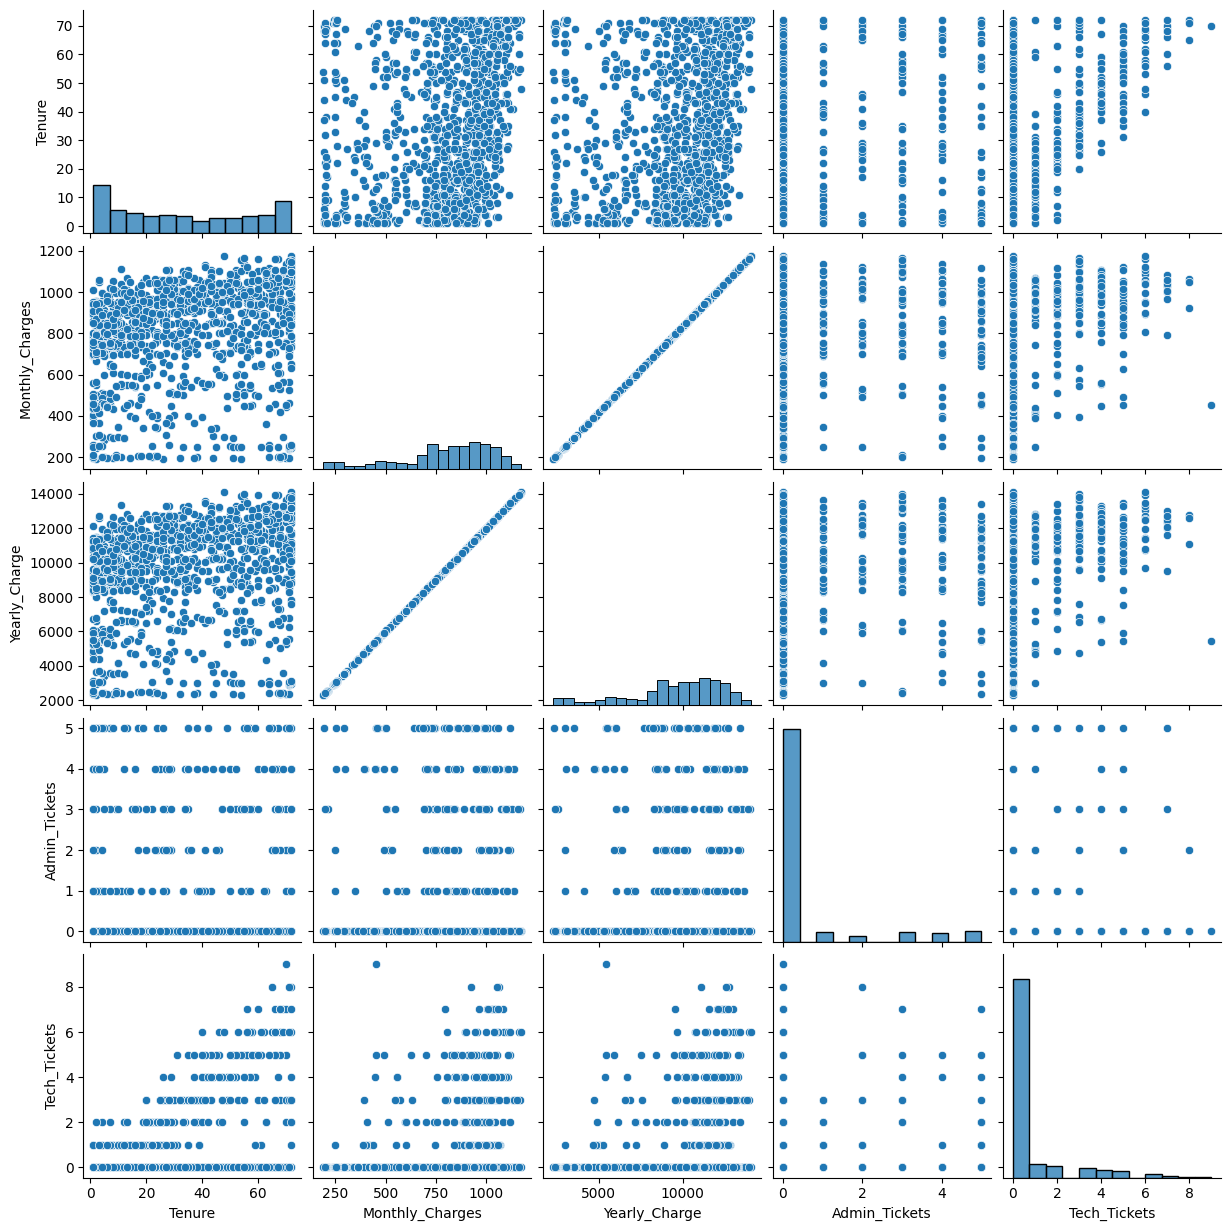

In [10]:
sns.pairplot(data=df,markers=['^','v'],palette="inferno")

In [ ]:
df.head(2)

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
0,Male,Yes,No,No,1,No,No phone service,DSL,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,396.5,4758,0,0,Yes
1,Female,Yes,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,Two year,Yes,Credit card (automatic),963.5,11562,0,0,No


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Senior_Citizen"] = le.fit_transform(df["Senior_Citizen"])
df["Partner"] = le.fit_transform(df["Partner"])
df["Dependents"] = le.fit_transform(df["Dependents"])
df["Phone_Service"] = le.fit_transform(df["Phone_Service"])
df["Multiple_Lines"] = le.fit_transform(df["Multiple_Lines"])
df["Internet_Service"] = le.fit_transform(df["Internet_Service"])
df["Online_Security"] = le.fit_transform(df["Online_Security"])
df["Online_Backup"] = le.fit_transform(df["Online_Backup"])
df["Device_Protection"] = le.fit_transform(df["Device_Protection"])
df["Tech_Support"] = le.fit_transform(df["Tech_Support"])
df["Streaming_TV"] = le.fit_transform(df["Streaming_TV"])
df["Streaming_Movies"] = le.fit_transform(df["Streaming_Movies"])
df["Contract"] = le.fit_transform(df["Contract"])
df["Paper_less_Billing"] = le.fit_transform(df["Paper_less_Billing"])
df["Payment_Method"] = le.fit_transform(df["Payment_Method"])
df["Churn"] = le.fit_transform(df["Churn"])

In [ ]:
for i in df:
  print(df[i].unique())

['Male' 'Female']
['Yes']
['No' 'Yes']
['No' 'Yes']
[ 1 71  2 43 25  8 60 18 66 64 56 30 37 27 72 58 15  7 23 11 65 13  4 29
  3 57 19 16 20 21 24  6 35 32 38  5 54 28 17 55 42 33 48 52 49 22 61 68
 50 47 44 10 40  9 46 70 26 62 53 45 14 12 59 39 34 69 67 41 31 36 51 63]
['No' 'Yes']
['No phone service' 'Yes' 'No']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Month-to-month' 'Two year' 'One year']
['Yes' 'No']
['Electronic check' 'Credit card (automatic)' 'Bank transfer (automatic)'
 'Mailed check']
[ 396.5  963.5  955.   452.5  902.5  695.   806.5  748.5  954.5 1084.5
 1116.  1105.   747.5  747.   985.   455.5  765.   780.5  564.5  704.5
  880.5  239.5  453.   744.5  764.5  868.   950.   944.   548.   753.5
  744.   402.   450.   411.5 1069.   898.5 1050.   944.5 1070.5  649.5
  745.   761.   8

In [ ]:
for i  in df:
  print(df[i].unique())

[1 0]
[0]
[0 1]
[0 1]
[ 1 71  2 43 25  8 60 18 66 64 56 30 37 27 72 58 15  7 23 11 65 13  4 29
  3 57 19 16 20 21 24  6 35 32 38  5 54 28 17 55 42 33 48 52 49 22 61 68
 50 47 44 10 40  9 46 70 26 62 53 45 14 12 59 39 34 69 67 41 31 36 51 63]
[0 1]
[1 2 0]
[0 1 2]
[0 2 1]
[0 2 1]
[2 0 1]
[0 2 1]
[0 2 1]
[2 0 1]
[0 2 1]
[1 0]
[2 1 0 3]
[ 396.5  963.5  955.   452.5  902.5  695.   806.5  748.5  954.5 1084.5
 1116.  1105.   747.5  747.   985.   455.5  765.   780.5  564.5  704.5
  880.5  239.5  453.   744.5  764.5  868.   950.   944.   548.   753.5
  744.   402.   450.   411.5 1069.   898.5 1050.   944.5 1070.5  649.5
  745.   761.   893.5 1008.   749.  1011.5  693.5  931.5  824.5  829.
  703.5  359.   826.5  546.5  721.   970.   891.5  419.   541.   307.5
  648.   199.5  854.5  848.   443.   950.5 1099.   546.   939.5  813.5
  706.5  753.   516.5 1051.  1015.5  697.5 1160.5 1021.   206.5  760.5
  814.5  640.5  284.5  807.   941.   943.   743.5  700.5  752.   516.
 1157.5  999.  1071.5 1019.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1142 non-null   int64  
 1   Senior_Citizen      1142 non-null   int64  
 2   Partner             1142 non-null   int64  
 3   Dependents          1142 non-null   int64  
 4   Tenure              1142 non-null   int64  
 5   Phone_Service       1142 non-null   int64  
 6   Multiple_Lines      1142 non-null   int64  
 7   Internet_Service    1142 non-null   int64  
 8   Online_Security     1142 non-null   int64  
 9   Online_Backup       1142 non-null   int64  
 10  Device_Protection   1142 non-null   int64  
 11  Tech_Support        1142 non-null   int64  
 12  Streaming_TV        1142 non-null   int64  
 13  Streaming_Movies    1142 non-null   int64  
 14  Contract            1142 non-null   int64  
 15  Paper_less_Billing  1142 non-null   int64  
 16  Paymen

In [ ]:
df.corr()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
Gender,1.000000,NaN,0.129581,0.021089,0.027751,-0.040948,0.023326,-0.003422,-0.025649,-0.024636,...,-0.018202,0.022925,0.004318,-0.001248,-0.021133,-0.053998,-0.053998,0.019535,0.033843,-0.011546
Senior_Citizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,0.129581,NaN,1.000000,0.241486,0.338373,0.007196,0.132502,0.028138,0.138063,0.153988,...,0.091361,0.129274,0.221359,0.014360,-0.132219,0.125139,0.125139,0.033737,0.104684,-0.145047
Dependents,0.021089,NaN,0.241486,1.000000,0.140301,-0.008011,0.023701,-0.062808,0.074739,0.063361,...,0.052014,0.033336,0.090539,0.039750,-0.020493,0.030615,0.030615,-0.001734,0.043164,-0.104476
Tenure,0.027751,NaN,0.338373,0.140301,1.000000,0.026282,0.327828,0.018744,0.355904,0.442536,...,0.307940,0.315313,0.658723,-0.014418,-0.379280,0.267175,0.267175,0.026220,0.254684,-0.428767
Phone_Service,-0.040948,NaN,0.007196,-0.008011,0.026282,1.000000,0.088121,0.529584,0.035672,-0.020618,...,0.034052,0.034741,0.028964,0.005586,-0.043644,0.514955,0.514955,0.021989,0.033811,-0.004022
Multiple_Lines,0.023326,NaN,0.132502,0.023701,0.327828,0.088121,1.000000,0.081687,0.027104,0.135011,...,0.211226,0.214024,0.103082,0.119575,-0.084505,0.382546,0.382546,0.014830,0.191981,0.012165
Internet_Service,-0.003422,NaN,0.028138,-0.062808,0.018744,0.529584,0.081687,1.000000,-0.054712,-0.044324,...,0.107801,0.112409,0.002550,0.058354,0.020744,0.257728,0.257728,-0.019022,0.037811,0.048199
Online_Security,-0.025649,NaN,0.138063,0.074739,0.355904,0.035672,0.027104,-0.054712,1.000000,0.187065,...,0.015490,0.052287,0.384816,-0.111850,-0.199649,0.046362,0.046362,0.028936,0.034881,-0.255113
Online_Backup,-0.024636,NaN,0.153988,0.063361,0.442536,-0.020618,0.135011,-0.044324,0.187065,1.000000,...,0.159692,0.137462,0.297071,0.042430,-0.179946,0.180459,0.180459,0.006837,0.137261,-0.218888


<ipython-input-60-08d42c39decf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Tenure"])
<ipython-input-60-08d42c39decf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Monthly_Charges"])


<Axes: xlabel='Monthly_Charges', ylabel='Density'>

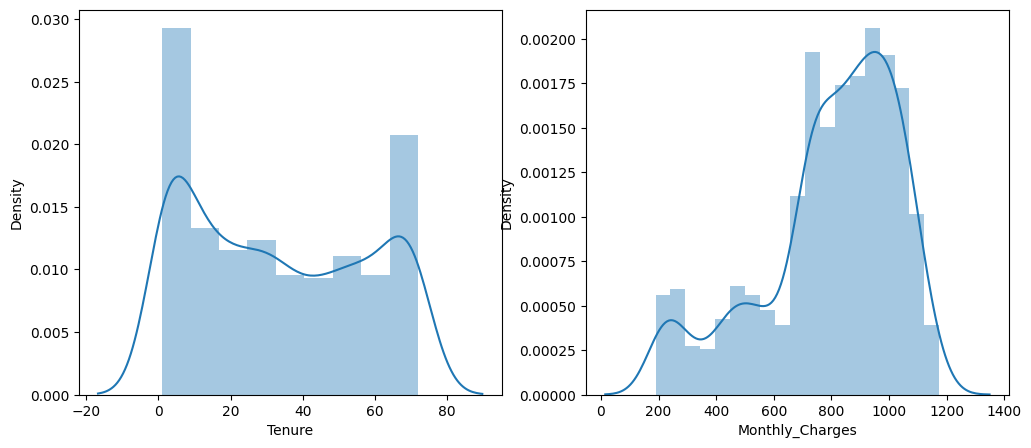

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df["Tenure"])
plt.subplot(1,2,2)
sns.distplot(df["Monthly_Charges"])

<Axes: ylabel='count'>

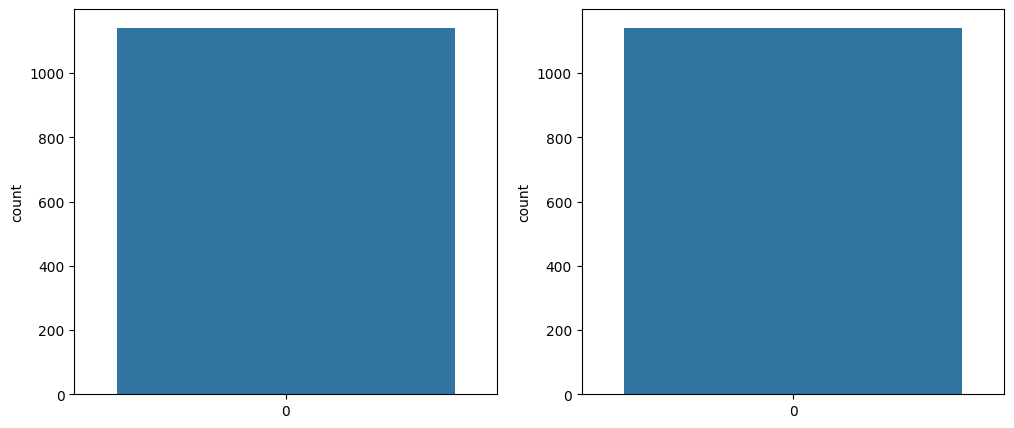

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(df["Gender"])
plt.subplot(1,2,2)
sns.countplot(df["Dependents"])

<Axes: xlabel='Churn', ylabel='Monthly_Charges'>

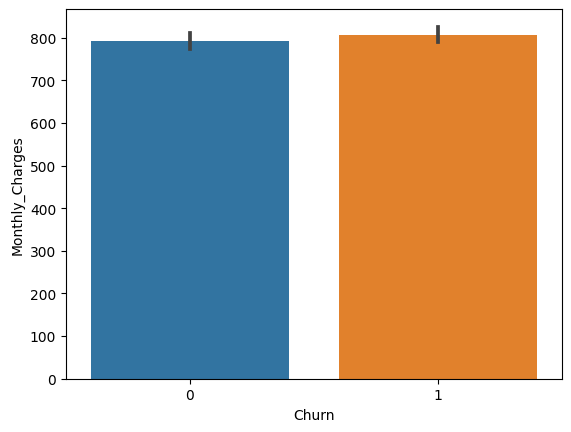

In [ ]:
sns.barplot(x="Churn",y="Monthly_Charges",data=df)

<Axes: >

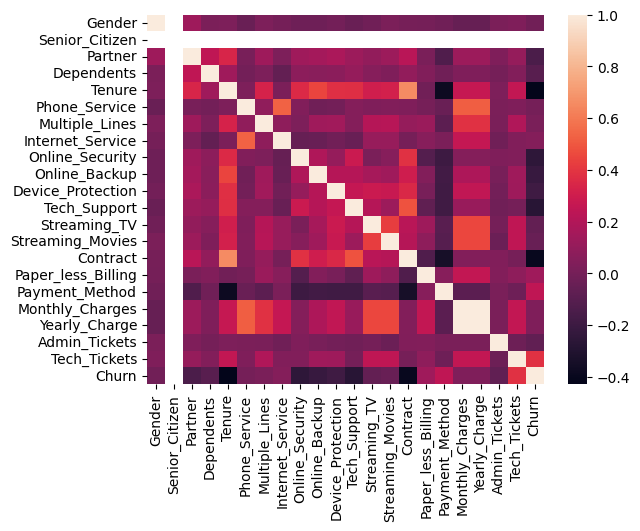

In [ ]:
sns.heatmap(df.corr(),annot=False)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has bee

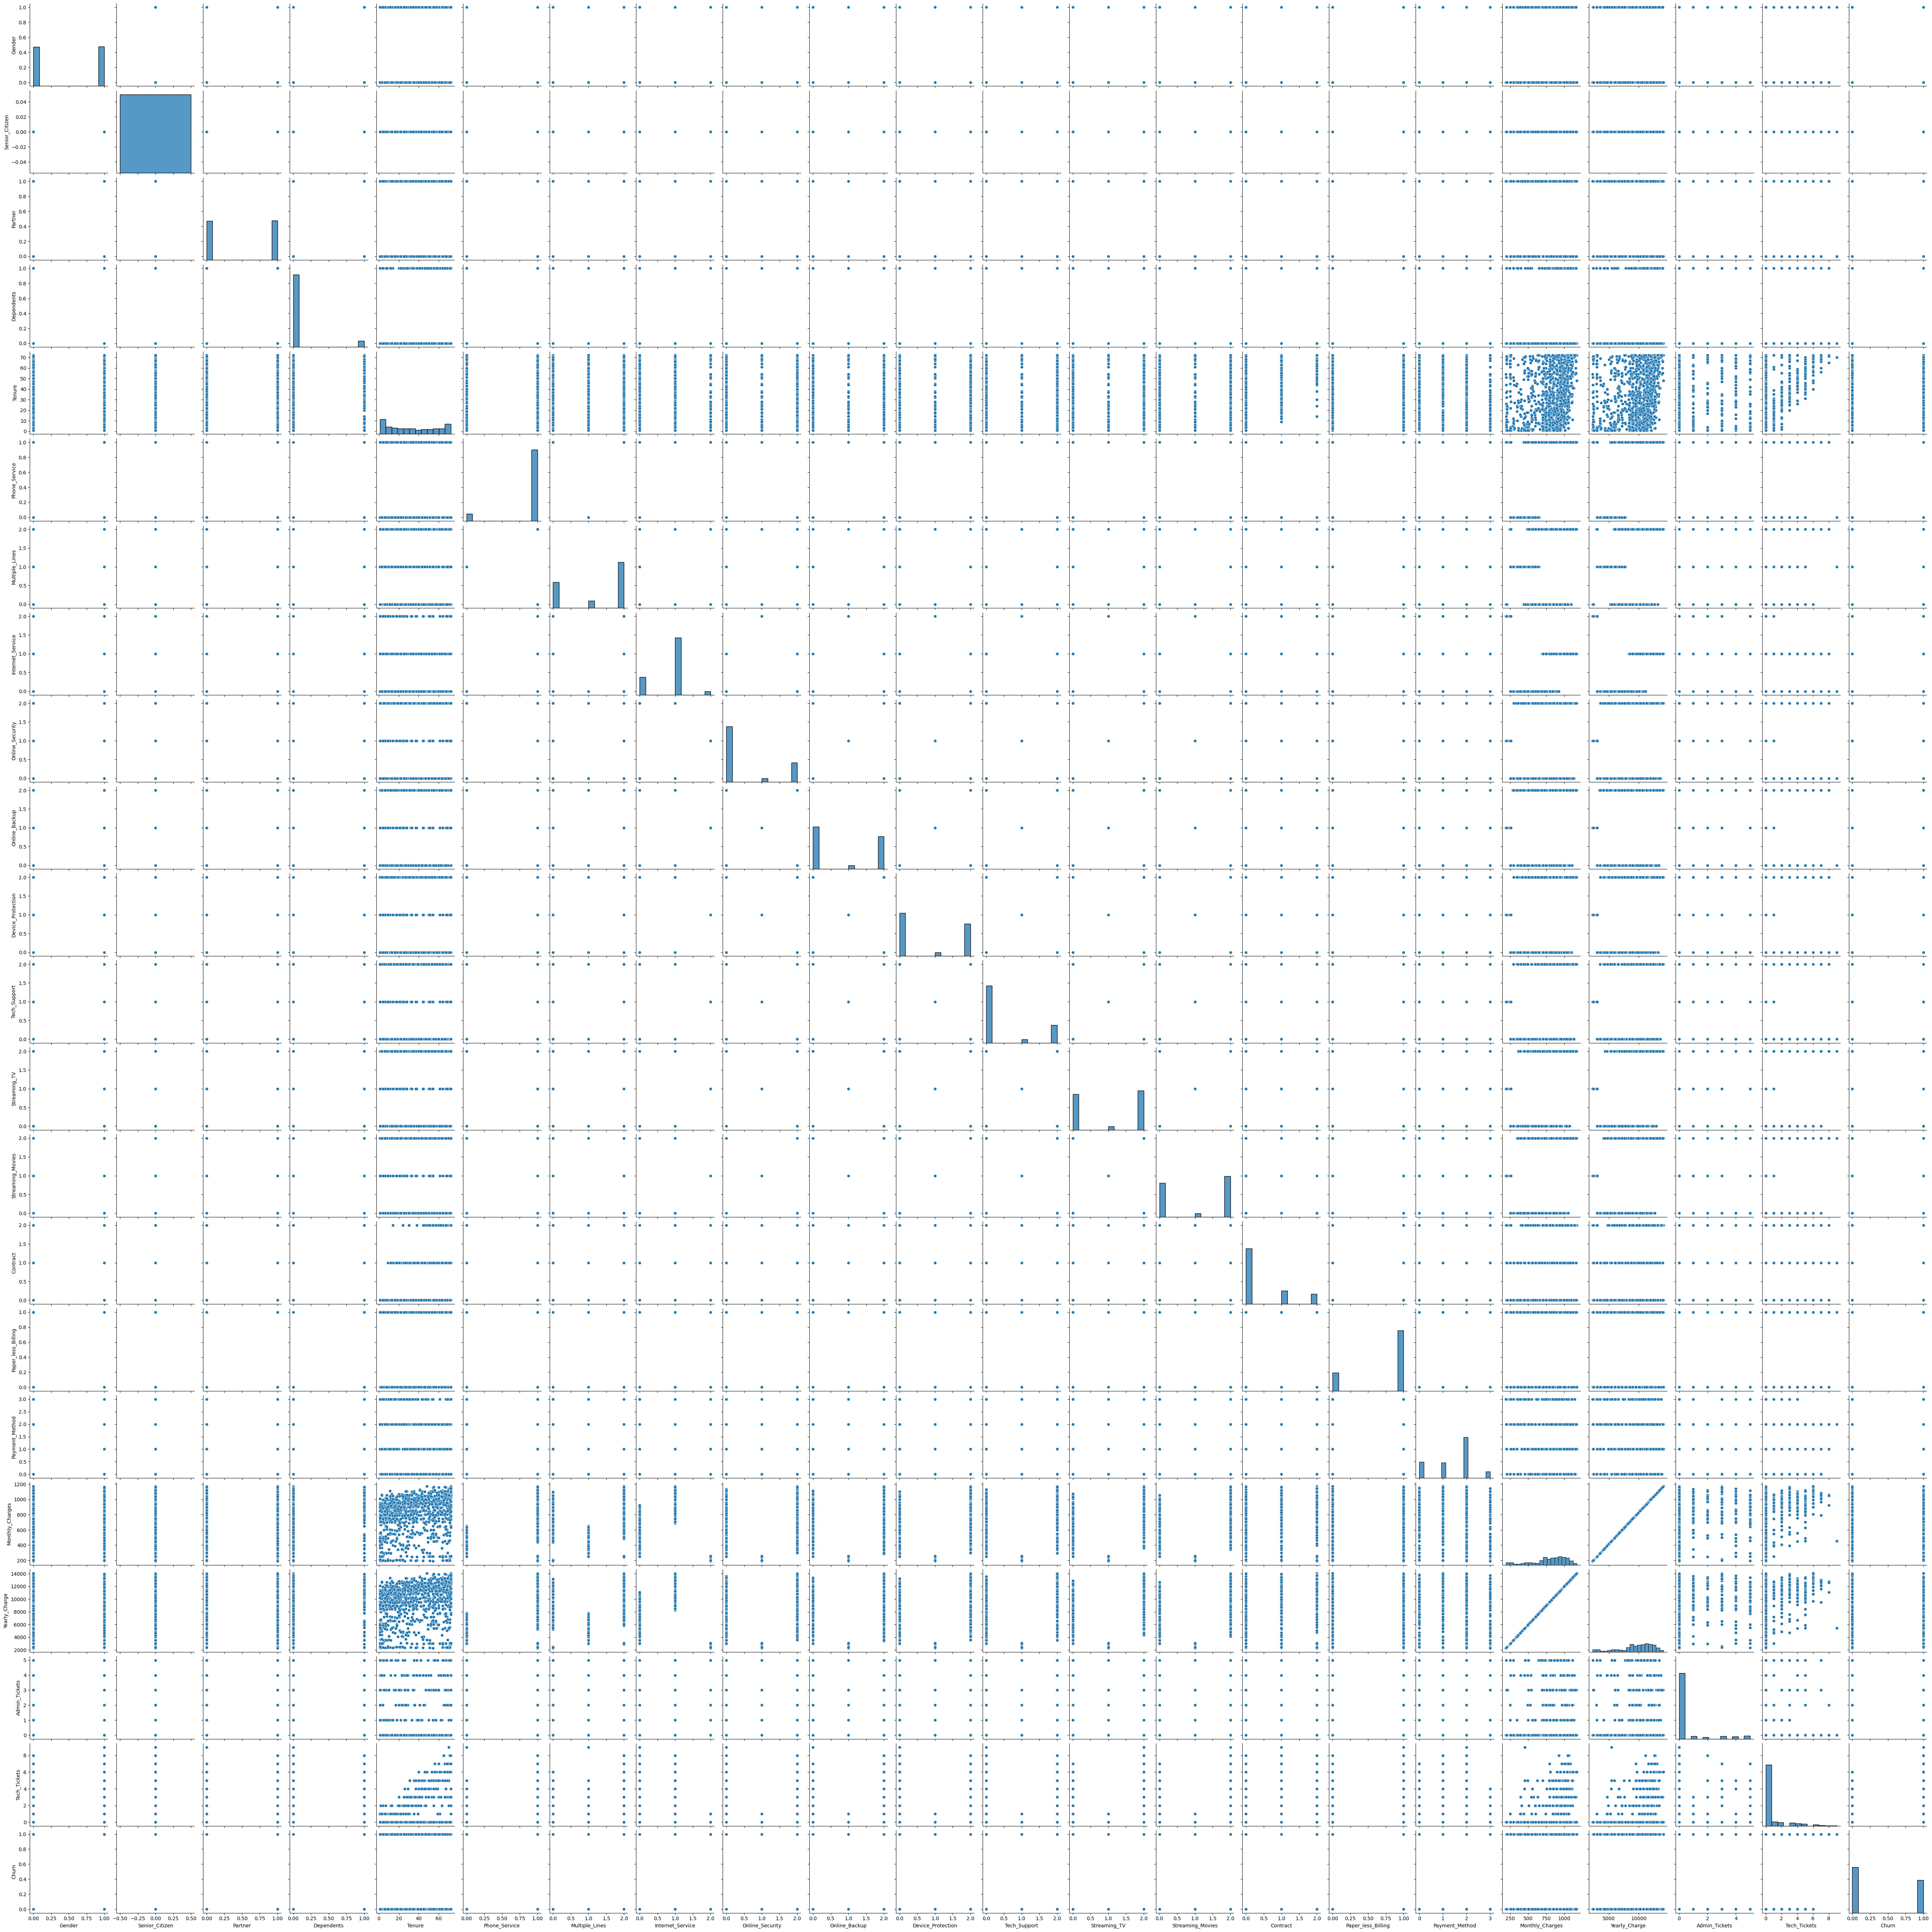

In [ ]:
sns.pairplot(data=df, markers=["^","v"], palette = "inferno")

In [ ]:
x= df.iloc[:,0:19].values
y= df.iloc[:,19:20].values

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_resample, y_resample = smt.fit_resample(x,y)
x_resample

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 3.96500000e+02, 4.75800000e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 9.63500000e+02, 1.15620000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 9.55000000e+02, 1.14600000e+04],
       ...,
       [5.16750610e-01, 0.00000000e+00, 4.83249390e-01, ...,
        2.48324939e+00, 3.75163347e+02, 4.50196016e+03],
       [1.00000000e+00, 0.00000000e+00, 9.58937904e-01, ...,
        1.23186288e-01, 7.10184779e+02, 8.52221735e+03],
       [1.00000000e+00, 0.00000000e+00, 8.00268285e-01, ...,
        1.19973171e+00, 9.01598524e+02, 1.08191823e+04]])

In [ ]:
y_resample

array([0, 0, 0, ..., 5, 5, 5])

In [ ]:
x.shape, x_resample.shape

((1142, 19), (5718, 19))

In [ ]:
y.shape, y_resample.shape

((1142, 1), (5718,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_train.shape

(4574, 19)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
lr_pred = lr.predict(x_test)

In [ ]:
lr_pred

array([0, 4, 2, ..., 5, 2, 4])

In [ ]:
y_test

array([1, 4, 1, ..., 0, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(lr_pred,y_test)

In [ ]:
lr_acc

0.4256993006993007

In [ ]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(lr_pred,y_test)

In [ ]:
lr_cm

array([[ 27,  11,  15,  22,  10,  20],
       [ 38, 110,  14,  16,  21,  38],
       [ 38,  16, 159,  44,  29,  18],
       [ 25,   7,  16,  52,  28,  11],
       [ 33,  18,   3,  25,  70,  15],
       [ 35,  19,   7,  32,  33,  69]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0,criterion= "entropy")
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
dtc_pred = dtc.predict(x_test)

In [ ]:
dtc_pred

array([1, 5, 3, ..., 1, 0, 3])

In [ ]:
dtc_acc = accuracy_score(dtc_pred,y_test)

In [ ]:
dtc_acc

0.3793706293706294

In [ ]:
dtc_cm = confusion_matrix(dtc_pred,y_test)
dtc_cm

array([[21,  1, 22,  8,  3,  6],
       [39, 94, 44, 25, 31, 39],
       [42, 27, 79, 51, 17, 16],
       [31, 23, 41, 81, 21, 28],
       [27,  8, 22,  5, 78,  1],
       [36, 28,  6, 21, 41, 81]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 10,criterion="entropy",random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
rfc_pred = rfc.predict(x_test)

In [ ]:
rfc_pred

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
rfc_acc = accuracy_score(rfc_pred,y_test)

In [ ]:
rfc_acc

0.5428321678321678

In [ ]:
rfc_cm = confusion_matrix(rfc_pred,y_test)

In [ ]:
rfc_cm 

array([[ 43,   1,  14,   5,   2,   3],
       [ 49, 143,  39,  18,  34,  21],
       [ 16,  19, 107,  32,  17,   3],
       [ 23,   6,  10, 103,  12,  27],
       [ 32,   0,  44,   8, 111,   3],
       [ 33,  12,   0,  25,  15, 114]])

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel= "linear") 
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
svm_pred = svm.predict(x_test)
svm_pred

array([0, 4, 0, ..., 5, 2, 4])

In [ ]:
svm_acc = accuracy_score(svm_pred,y_test)
svm_acc

0.506993006993007

In [ ]:
svm_cm = confusion_matrix(svm_pred,y_test)
svm_cm

array([[ 33,   8,   4,  17,  19,  13],
       [ 36, 126,  12,  30,  27,  31],
       [ 34,   8, 185,  29,  32,  20],
       [ 26,   4,   3,  79,  14,  18],
       [ 27,  10,   0,  23,  74,   6],
       [ 40,  25,  10,  13,  25,  83]])

In [ ]:
#svm_pred_own = svm.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))

In [ ]:
#svm_pred_own

In [ ]:
import pickle
pickle.dump(rfc,open("churn.pkl" ,"wb"))

NameError: ignored